<h1>What's Federated Learning</h1>
The concept of federated learning is proposed by Google AI on 2016, Their main idea is
to build machine learning models based on data sets that are distributed across multiple devices
while preventing data leakage and sharing data between any two couple of devices. Recent improvements have been focusing on overcoming the statistical challenges, (such as non iid-data and the amount of data hold by each client) and also in improving security in federated learning.
Federated Learning (FL), is highly adapted to the healthcare domain, it's simply used to make a set of hospitals to collaboratively train a joint model, which will be used by all the hospitals after that.
<img src="Images/FL_gen.png"  style="width:600px ;height:600px"> 

<h1>What's Differential Privacy</h1>
Differential Privacy was early introduced by Dwork et al,  The methods of differential privacy, k-anonymity, and
diversification  involve in adding noise to the data, or using generalization methods to obscure
certain sensitive attributes until the third party cannot distinguish the individual, thereby making
the data impossible to be restore to protect user privacy. However, the root of these methods still
require that the data are transmitted elsewhere and these work usually involve a trade-off between
accuracy and privacy. In, most of recents reseach has introduced a differential privacy approach to federated
learning in order to add protection to client-side data by hiding client’s contributions during
training, using differents approaches.
<img src="Images/GDP.png"  style="width:400px ;height:200px"> <img src="Images/LDP.png"  style="width:400px ;height:200px">
 

<h1>Privacy Enhancing Technologies (PETs)</h1>
Privacy-enhancing technologies or PET are designed to prevent data leaks while balancing privacy with usability. Some PETs even prevent bad actors from identifying to whom the collected data belongs - if a leak were to occur, the data would be virtually useless to cybercriminals, and they are mainly digital solutions (Softwares).
There are many different types of PETs, each designed to solve a specific business problem. While some are better at aggregated analytics, others are more suited for precise results. Likewise, some may be ideal for deriving insights from sensitive data, while others are best for data exploration.
we will mention  the following frameworks:
<ul>
    <li>  <a href="https://flower.dev">Flower</a> </li>
    <li>  <a href="https://github.com/OpenMined/PySyft">Pysyft</a> </li>
    <li>  <a href="https://opacus.ai/">Opacus</a></li>
</ul>

<h1> MEDfl</h1>
MEDfl is a new python package, which is a hybridization of Flower and Opacus, while getting inspired by the Pysyft framework, the main strengths of MEDfl is that  both users and developpers will  benifit from  all features of the three listed frameworks.
<h2>A small real world scenario</h2>
<b>Martin</b> is an AI researcher, his main interest is  the applications of AI into the healthcare domain.
Recently, he has obtained a call from a prestigious institute, in order to make a study about the realisation of a new project. The project's goal is  designing and developping a federated learning system between a set of hospitals, and that by training and using a deep learning model with preserving the privacy of all patient records.

When Martin finished the first analysis of the project statement, he realized that the project involve the use of Federated Learning, Differential Privacy within a good storage monitoring system.

Fortunately, Martin knows MEDfl, and he is pretty sure that it's designed for such tasks, and it will be do the desired work.
Medfl with his two main sub-packages,<b>NetManager</b> , <b>Federated</b>, let us designing FL expirements and simulating real world scenarios, and that by using differents options to make  differents FL architectures (or setups) as well as using differents FL pipelines.



<h1> MEDfl</h1>
MEDfl is a new python package, which is a hybridization of Flower and Opacus, while getting inspired by the Pysyft framework, the main strengths of MEDfl is that  both users and developpers will  benifit from  all features of the three listed frameworks.
<h2>A small real world scenario</h2>
<b>Martin</b> is an AI researcher, his main interest is  the applications of AI into the healthcare domain.
Recently, he has recieved a call from a prestigious institute, in order to make a study about the realisation of a new project. The project's goal is  designing and developping a federated learning system between a set of hospitals, and that by training and using a deep learning model with preserving the privacy of all patient records.

When Martin finished the first analysis of the project statement, he realized that the project involve the use of Federated Learning, Differential Privacy within a good storage monitoring system.

Fortunately, Martin knows MEDfl, and he is pretty sure that it's designed for such tasks, and it will be do the desired work.
Medfl with his two main sub-packages,<b>NetManager</b> , <b>Federated</b>, let us designing FL expirements and simulating real world scenarios, and that by using differents options to make  differents FL architectures (or setups) as well as using differents FL pipelines.



<h1>NetManager Sub-Package</h1>
In order ot start simulating, hospitals architectures, their datasets, and theirs interactions. Martin should  familiarize with The NetManager Sub-Package, because, it provides the mechanizmes to :
  <ul>
    <li> Choose the dataset format used by all hospitals, as we are working in a <b>Horizontal Federated Learning HFL</b> settings.  </li>
    <li> Create virtual hospitals in a two way :</li>
    <h5>Automatically : </h5> 
      This method used when Martin doesn't have an idea about hospitals name, their datasets. so, the creation will based on some  variables on the datasets, in our Proof-Of-Concept with the eICU dataset, there are two variables that can be used, "site_hosiptal, and "site_region".  <br> Note that, hospitals can participate for <b>training</b> or for <b>testing</b> only. (this may be changed to support both modes) . <br> the set of hospitals or (Nodes) perform a network, and on MEDfl terminology, a network and its additional informations, refered as a <b>FLsetup (Federated Learning Setup)</b> <br>After the creation of an <b>FLsetup</b> it will be stored on the DB, by a unique ID, a name, a description, and a creation date.
  <h5>Manually :</h5>
      Martin can also create a FLsetup manually, create a network, and add each node separately, then uploade a dataset on each node.
    
  </ul>  
In the following section we will tranlsate all this paragraph to code, and show how powerful and easy to use <b>MEDfl</b> is !
    

<h3> 1) Create a FLsetup Automatically</h3>
To create a FLsetup (network, training nodes and test nodes) manually, with MEDfl, we should follow the following steps: <ul>
    <li>Create a network </li>
    <li>Create the FLsetup object, to make things more organized, and facilitate the storage process</li>
    <li>Create the master dataset table, that contains the dataset that be used to create all the nodes (hospitals).</li>
    <li>Select a column from the dataset, then create training and testing nodes using its modalities (unique values)</li>  
 
</ul>   
 

In [1]:
import sys
sys.path.append(r'/home/hlpc/Desktop/Github/MEDfl/')

import os
os.environ['PYTHONPATH'] = '/home/hlpc/Desktop/Github/MEDfl/'

In [2]:
from Medfl.LearningManager.utils import *
empty_db()

<h4>Network Creation</h4>
The creation of a network in MEDfl, like any object creation in Python, is simply done by calling the Network Class, and create a network object by passing the name of the network. below you find the illustration of the network class, its attributes and functions.
(add class diagram)

In [3]:
from Medfl.NetManager.network import Network
network_obj = Network(name="Auto_network")


<h4> Master Dataset Table Creation</h4>
To create a the master dataset table, we have to provide a <b>CSV File</b>, that contain the dataset, 
then the "create_master_dataset" function from the Network class, will create a table on the MySQL DB. 
and from this table, we will generate our train/test nodes and datasets. <br>
<b>Note:</b> if the table already exists on the DataBase, the function will retrun an exception message.

In [4]:
path = '~/Desktop/Github/MEDfl/Notebooks/sapsii_score_knnimputed_eicu.csv'

network_obj.create_master_dataset(path_to_csv = path)

<h4>FLsetup Creation</h4>
The same for FLsetup, we call the FLsetup Class, to create a FLsetup object by passing the name of the FLsetup, its description, and the network associated ot it. <br>below you find the illustration of the network class, its attributes and functions. (add class diagramm)

In [5]:
from Medfl.NetManager.flsetup import FLsetup
fl_setup = FLsetup(name = "Flsetup1", description = "The first fl setup",network = network_obj)

<h4>Nodes Creation</h4>
The user should create a parameters dictionary that contains  :
<ul> 
    <li>The name of the column that be used to create the nodes, which is the main element in the <b>Automatic Method</b></li> 
    <li> The lists of the train/test nodes</li>
    </ul> 
and parse it to the create_nodes_from_master_dataset function from the FLsetup class.<br>
Node is also an object, and it will be stored on the DataBase.

In [6]:
params_dict = {'column_name' : 'site_region','train_nodes' : ["Midwest","South"] , 'test_nodes' : ['West','Northeast'] }

eicu_nodes = fl_setup.create_nodes_from_master_dataset(params_dict = params_dict )

[node.name  for node in eicu_nodes]  

['Midwest', 'South', 'West', 'Northeast']

<h4>Federated DataSet</h4>
the function "create_federated_dataset", will create, train loaders, test loaders from the datasets of the nodes.
in the automatic method, the datasets is created from the master dataset table, the trainloader of each node will contains the records with the same name.<br>
After the creation of the federated dataset, the FLsetup will be stored into the FLsetup table in the DB.


In [7]:
fl_dataset = fl_setup.create_federated_dataset()
len(fl_dataset.testloaders[1])

SELECT * FROM MasterDataset WHERE site_region = 'Midwest'
SELECT * FROM MasterDataset WHERE site_region = 'South'
SELECT * FROM MasterDataset WHERE site_region = 'West'
SELECT * FROM MasterDataset WHERE site_region = 'Northeast'


708

<h3>2) Create a FLsetup Manually</h3>
The manual creation of a FLsetup  with MEDfl, it's a bit different from the the automatic method,but it stays on the same scope, the only difference is here, we should create all the object (FLsetup,network, training nodes and test nodes),
We will start doing the following : <ul>
    <li>Create a network </li>
    <li>Create Master Dataset, Here the master_dataset table will be used to ensure that all nodes hold the same dataset format (horizontal federated learning)</li>
    <li> Create train and test nodes, inside the created network .
    <li> Upload datasets inside each node </li>    
    <li>Create the FLsetup object, to make things more organized, and facilitate the storage process</li>
     
 
</ul>   

<h3>Network Creation</h3>

In [8]:
from Medfl.NetManager.network import Network
network_obj = Network(name="man_network")
network_obj.create_network()

<h3>Nodes creation</h3>
we will create 3 hospitals, two are for training, and the last one is for testing (after the federation, and this by setting the train variable to "1" for the training nodes, and to "0" for the testing Node. <br>
Then we add these nodes to our network.

In [9]:
from Medfl.NetManager.node import Node

hospital_1,hospital_2,hospital_3 = Node(name = "hospital_1", train = 1),Node(name = "hospital_2", train = 1), Node(name = "hospital_3", train = 0) 



<h3>Add this nodes to the network</h3>

In [10]:
network_obj.add_node(hospital_1)
network_obj.add_node(hospital_2)
network_obj.add_node(hospital_3)

<h3>Uploading Datasets into nodes</h3>
To upload a dataset into a node, we have to choose a csv file, then this file will be stored on the DataSet table on the DB.

In [11]:
path = '~/Desktop/Github/MEDfl/Notebooks/eicu_test.csv'
hospital_1.upload_dataset( dataset_name = "hospital_1_dataset" , path_to_csv  = path )
hospital_2.upload_dataset( dataset_name = "hospital_2_dataset" , path_to_csv  = path )
hospital_3.upload_dataset( dataset_name = "hospital_3_dataset" , path_to_csv  = path )

<h3>Create the FLsetup and Generate the federated dataset</h3>

In [12]:
from Medfl.NetManager.flsetup import FLsetup
fl_setup = FLsetup(name = "Manual_Flsetup", description = "The first manual fl setup",network = network_obj)

In [13]:
fl_dataset = fl_setup.create_federated_dataset()
 

<h1>Federated Sub-Package</h1>
Once Martin Finish his work on the architecture of hospitals, and their datasets, He starts thinking on the theoritical side of federated learning of the project, that includes, the machine learning model and its parameters and hyperparameters, the federated learning server and its parameters (number of rounds, number of clients per rounds, the aggregation algorithms, ...etc). <br>
<b>The Federated module</b>  of <b>MEDfl</b>, which is based on the <a href="https://flower.dev/">Flower</a> framework, is well designed for doing this task, it's mainly follows the flower paradigm, but with many customization, to deal with the SQL database, and to be homogeneous with the <b>NetManager</b>

<h2>How it works ?</h2>
The Federated module, can only be used after the creation of an <b>FLsetup</b>, because the FLsetup will generate a federated dataset, which be used by an <b>FLpipeline</b> object.
<h2> The Code</h2>
Let's create a random FLsetup, then use its object to read one of the created FLsetup from the database.

In [14]:
random_flsetup = FLsetup(name = "Random_FLsetup", description = "A random FLsetup",network = Network("Random_net"))

In [15]:
random_flsetup.list_allsetups()

,FLsetupId,name,description,creation_date,NetId,column_name
0,1,Flsetup1,The first fl setup,2023-08-12 05:58:07,1,site_region
1,2,Manual_Flsetup,The first manual fl setup,2023-08-12 05:58:13,2,None


In [16]:
New_flsetup = random_flsetup.read_setup( FLsetupId = 1) # this is not working with auto_net

In [17]:
New_flsetup.network.name

'Auto_network'

In [18]:
New_flsetup.column_name

'site_region'

<h2>Federated DataSet</h2> 
This object has the role of the connector between the <b>NetManager</b> and the <b>Federated</b> modules.<br>
The FLsetup class's function "create_federated_dataset", will go through all nodes,and generate trainloders & valloaders for the train nodes, and testloaders for the test nodes

In [19]:
#here's the reduduncy of feddatasets
fl_dataset = New_flsetup.create_federated_dataset()
fl_dataset.size

SELECT * FROM MasterDataset WHERE site_region = 'Midwest'
SELECT * FROM MasterDataset WHERE site_region = 'South'
SELECT * FROM MasterDataset WHERE site_region = 'West'
SELECT * FROM MasterDataset WHERE site_region = 'Northeast'


17

<h2>Machine Learning </h2>
As MEDfl is based on flower, it has only 3 models based on torch neural nets  :
<ul>
    <li> Binary Classifier </li>
    <li> Multiclass Classifier</li>
    <li> Linear Regressor</li>
</ul>
the choice of the model and all machine learning parameters (learning rate, eopch size, train epochs), should be declared on a YAML file.

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

class BinaryClassifier(nn.Module):
  def __init__(self,input_dim,hidden_dim,output_dim):

    super(BinaryClassifier, self).__init__()
    self.fc1 = nn.Linear(input_dim,hidden_dim)
    self.fc2 = nn.Linear(hidden_dim,2*hidden_dim)
    self.fc3 = nn.Linear(2*hidden_dim,output_dim)

  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))#softmax
    return x
binary_classifier= BinaryClassifier(17,6,1)
optimizer,criterion = optim.SGD(binary_classifier.parameters(), lr=0.0001),nn.BCELoss()
binary_classifier

BinaryClassifier(
  (fc1): Linear(in_features=17, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=12, bias=True)
  (fc3): Linear(in_features=12, out_features=1, bias=True)
)

In [21]:
from Medfl.LearningManager.model import Model
global_model = Model(binary_classifier,optimizer,criterion)

<h2>Aggregation Algorithms (Strategy)</h2>
Aggregation algorithms are the mechanizms used by the server to produce a joint unified model, they are known as <b>Strategies</b> on <b>Flower</b>,  in the literature we have many aggregation algorithms, it's true that not all of them are implemented in flower, but we have the most used ones:
 <ul>
    <li><a href = "arxiv.org/abs/1602.05629">Federated Averaging (FedAvg)</a></li>
    <li><a href = "arxiv.org/abs/2003.00295">Adaptive Federated Optimization using Adam (FedAdam)</a></li>
    <li><a href = "arxiv.org/pdf/1803.01498v1.pdf">Federated Median (FedMedian)</a></li>
    <li><a href = "arxiv.org/pdf/1909.06335.pdf">Federated Averaging with Momentum (FedAvgM)</a></li>
    <li><a href = "arxiv.org/abs/2003.00295">Adaptive Federated Optimization using Yogi (FedYogi)</a></li>
    <li><a href = "arxiv.org/abs/2003.00295">Adaptive Federated Optimization (FedOpt)</a></li>
    <li><a href = "arxiv.org/abs/1812.06127">Federated Optimization (FedProx)</a></li>
    <li><a href = "openreview.net/pdf?id=ByexElSYDr">FAIR RESOURCE ALLOCATION IN FEDERATED LEARNING (QFedAvg)</a></li>
    <li><a href = "arxiv.org/abs/2003.00295">Adaptive Federated Optimization using Adagrad (FedAdagrad)</a></li>
 </ul>
We can also find them on the strategy directory on Flower.

In [22]:
import flwr as fl
dir(fl.server.strategy)

['FaultTolerantFedAvg',
 'FedAdagrad',
 'FedAdam',
 'FedAvg',
 'FedAvgAndroid',
 'FedAvgM',
 'FedMedian',
 'FedOpt',
 'FedProx',
 'FedYogi',
 'QFedAvg',
 'Strategy',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'aggregate',
 'fault_tolerant_fedavg',
 'fedadagrad',
 'fedadam',
 'fedavg',
 'fedavg_android',
 'fedavgm',
 'fedmedian',
 'fedopt',
 'fedprox',
 'fedyogi',
 'qfedavg',
 'strategy']

The creation of a strategy is based on the "Strategy" Class, it's enough to pass the name of one of the mentionned strategies, and other federated learning parameters which are used during federation rounds.
<ul>
    <li>fraction_fit : the fraction of clients to sample in order  to train the model </li>
    <li>fraction_evaluate  : the fraction of clients to sample in order to evaluate the model (validation) </li>
    <li>min_fit_clients :  the minimum number of clients to sample for the training on each round</li>
    <li>min_evaluate_clients : the minimum number of clients to be sampled for the evaluation on each round </li>
    <li>min_available_clients : the minimum  required number of available clients to start a federation round </li>
<ul>

In [23]:
from Medfl.LearningManager.strategy import Strategy
fed_avg = Strategy("FedAvg", fraction_fit = 1.0 ,fraction_evaluate = 1.0,min_fit_clients = 2,min_evaluate_clients = 2,min_available_clients = 2)

<h3>Federated Learning Server</h3>
The server in the FL terminology, is the set of the mechanizms that orchestrate  all the FL processes, (distributing the model to  clients, getting the models updates from clients, aggregate these updates. <br>
<b>Remark :</b> The FL ServerIt has no relation ! with webservers or any other server concepts.
<h4>MEDfl server</h4>
The FL server on MEDfl, is based on the server class of Flower, but with our customization, because <b>we have added</b> a gradient perturbing feature using <b> Opacus</b>, so we can make the FLpipeline <b>differentially private </b> <br>
The FLserver in MEDfl, has the follwoing attributes : 
<ul>
    <li> global_model : The global model
    <li> strategy : The  aggregation strategy
    <li> num_rounds : The number of federation rounds
    <li> num_clients : The number of train nodes
    <li>dataset : The federated dataset generated by an FLsetup
    <li> diff_privacy : a boolean variable to  enable (disable) the Differentially Private training mode
</ul>

In [24]:
#Create a server
from Medfl.LearningManager.server import *

server = FlowerServer(global_model, strategy = fed_avg, num_rounds = 10, num_clients  = len(fl_dataset.trainloaders), fed_dataset = fl_dataset,diff_privacy = False)

<h3>The federated learning pipeline (FLpipeline)</h3>

In [25]:
#Create a pipeline
from Medfl.LearningManager.flpipeline import *
ppl_1 = FLpipeline( name ="the first fl_pipeline",description = "this is our first FL pipeline",server = server)
ppl_1.server.run()

INFO flwr 2023-08-12 05:58:14,530 | app.py:145 | Starting Flower simulation, config: ServerConfig(num_rounds=10, round_timeout=None)
08/12/2023 05:58:14:INFO:Starting Flower simulation, config: ServerConfig(num_rounds=10, round_timeout=None)
2023-08-12 05:58:15,897	INFO worker.py:1518 -- Started a local Ray instance.
INFO flwr 2023-08-12 05:58:20,144 | app.py:179 | Flower VCE: Ray initialized with resources: {'CPU': 4.0, 'memory': 3750644123.0, 'object_store_memory': 1875322060.0, 'node:192.168.43.27': 1.0}
08/12/2023 05:58:20:INFO:Flower VCE: Ray initialized with resources: {'CPU': 4.0, 'memory': 3750644123.0, 'object_store_memory': 1875322060.0, 'node:192.168.43.27': 1.0}
INFO flwr 2023-08-12 05:58:20,161 | server.py:86 | Initializing global parameters
08/12/2023 05:58:20:INFO:Initializing global parameters
INFO flwr 2023-08-12 05:58:20,166 | server.py:266 | Using initial parameters provided by strategy
08/12/2023 05:58:20:INFO:Using initial parameters provided by strategy
INFO flwr 

Server-side evaluation loss 0.017081703785226214 / accuracy 0.7991071428571429


(launch_and_fit pid=19339) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19339)   warnings.warn(
(launch_and_fit pid=19342) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19342)   warnings.warn(


(launch_and_fit pid=19342) [Client 0] fit, config: {}
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.494099 Acc@1: 0.000000
(launch_and_fit pid=19339) [Client 1] fit, config: {}
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.461703 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.486784 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.477211 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.485529 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.471564 Acc@1: 3.828125
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.463646 Acc@1: 4.875000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.460126 Acc@1: 4.062500
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.453856 Acc@1: 3.482143
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.504744 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.518109 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.514545 Acc@1: 0

DEBUG flwr 2023-08-12 05:58:25,268 | server.py:229 | fit_round 1 received 2 results and 0 failures
08/12/2023 05:58:25:DEBUG:fit_round 1 received 2 results and 0 failures
WARNING flwr 2023-08-12 05:58:25,276 | fedavg.py:242 | No fit_metrics_aggregation_fn provided
08/12/2023 05:58:25:WARNING:No fit_metrics_aggregation_fn provided


(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.494584 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.476912 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.485654 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.471116 Acc@1: 3.828125
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.462875 Acc@1: 4.875000
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.459115 Acc@1: 4.062500
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.452516 Acc@1: 3.482143
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.453652 Acc@1: 3.046875
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.451341 Acc@1: 3.611111
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.456345 Acc@1: 3.250000
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.461080 Acc@1: 2.954545
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.494314 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.476685 Acc@1: 4.218750
(launch_and_fit pid=19342

INFO flwr 2023-08-12 05:58:25,312 | server.py:116 | fit progress: (1, 0.017058201116337764, {'accuracy': 0.7991071428571429}, 5.078441327001201)
08/12/2023 05:58:25:INFO:fit progress: (1, 0.017058201116337764, {'accuracy': 0.7991071428571429}, 5.078441327001201)
DEBUG flwr 2023-08-12 05:58:25,316 | server.py:165 | evaluate_round 1: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:25:DEBUG:evaluate_round 1: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-08-12 05:58:25,407 | server.py:179 | evaluate_round 1 received 2 results and 0 failures
08/12/2023 05:58:25:DEBUG:evaluate_round 1 received 2 results and 0 failures
WARNING flwr 2023-08-12 05:58:25,412 | fedavg.py:273 | No evaluate_metrics_aggregation_fn provided
08/12/2023 05:58:25:WARNING:No evaluate_metrics_aggregation_fn provided
DEBUG flwr 2023-08-12 05:58:25,418 | server.py:215 | fit_round 2: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:25:DEBUG:fit_round 2: strategy sampled 2 clients (out of 2)


Server-side evaluation loss 0.017058201116337764 / accuracy 0.7991071428571429
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.452289 Acc@1: 3.482143
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.453438 Acc@1: 3.046875
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.451112 Acc@1: 3.611111
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.456119 Acc@1: 3.250000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.460875 Acc@1: 2.954545
(launch_and_fit pid=19342) epsilon of client 0 : eps = 0
(launch_and_evaluate pid=19342) [Client 1] evaluate, config: {}
(launch_and_evaluate pid=19339) [Client 0] evaluate, config: {}


(launch_and_fit pid=19339) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19339)   warnings.warn(
(launch_and_fit pid=19342) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19342)   warnings.warn(


(launch_and_fit pid=19342) [Client 0] fit, config: {}
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.496367 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.477851 Acc@1: 4.218750
(launch_and_fit pid=19339) [Client 1] fit, config: {}
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.455211 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.482089 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.486465 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.471529 Acc@1: 3.828125
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.463138 Acc@1: 4.875000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.459260 Acc@1: 4.062500
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.452498 Acc@1: 3.482143
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.501252 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.515291 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.511758 Acc@1: 0

(raylet) [2023-08-12 05:58:25,879 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6573809664; capacity: 250375106560. Object creation will fail if spilling is required.


(launch_and_fit pid=19342) 	Train Epoch: 1 	Loss: 0.453399 Acc@1: 3.046875
(launch_and_fit pid=19342) 	Train Epoch: 1 	Loss: 0.451059 Acc@1: 3.611111
(launch_and_fit pid=19342) 	Train Epoch: 1 	Loss: 0.456147 Acc@1: 3.250000
(launch_and_fit pid=19342) 	Train Epoch: 1 	Loss: 0.460876 Acc@1: 2.954545
(launch_and_fit pid=19342) 	Train Epoch: 2 	Loss: 0.494885 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 2 	Loss: 0.514285 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 2 	Loss: 0.510777 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 2 	Loss: 0.517230 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 2 	Loss: 0.515334 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 2 	Loss: 0.516541 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 2 	Loss: 0.476915 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 2 	Loss: 0.485699 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 2 	Loss: 0.470935 Acc@1: 3.828125
(launch_and_fit pid=19339

DEBUG flwr 2023-08-12 05:58:26,753 | server.py:229 | fit_round 2 received 2 results and 0 failures
08/12/2023 05:58:26:DEBUG:fit_round 2 received 2 results and 0 failures


(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.493665 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.476101 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.485058 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.470418 Acc@1: 3.828125
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.462119 Acc@1: 4.875000
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.458279 Acc@1: 4.062500
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.451602 Acc@1: 3.482143
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.452769 Acc@1: 3.046875
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.450429 Acc@1: 3.611111
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.455443 Acc@1: 3.250000
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.460201 Acc@1: 2.954545
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.493079 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.475689 Acc@1: 4.218750


INFO flwr 2023-08-12 05:58:26,789 | server.py:116 | fit progress: (2, 0.017012660594867002, {'accuracy': 0.7991071428571429}, 6.555336788005661)
08/12/2023 05:58:26:INFO:fit progress: (2, 0.017012660594867002, {'accuracy': 0.7991071428571429}, 6.555336788005661)
DEBUG flwr 2023-08-12 05:58:26,796 | server.py:165 | evaluate_round 2: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:26:DEBUG:evaluate_round 2: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-08-12 05:58:26,882 | server.py:179 | evaluate_round 2 received 2 results and 0 failures
08/12/2023 05:58:26:DEBUG:evaluate_round 2 received 2 results and 0 failures
DEBUG flwr 2023-08-12 05:58:26,885 | server.py:215 | fit_round 3: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:26:DEBUG:fit_round 3: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.484734 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.470156 Acc@1: 3.828125
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.461867 Acc@1: 4.875000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.458027 Acc@1: 4.062500
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.451356 Acc@1: 3.482143
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.452541 Acc@1: 3.046875
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.450198 Acc@1: 3.611111
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.455195 Acc@1: 3.250000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.459965 Acc@1: 2.954545
(launch_and_fit pid=19342) epsilon of client 0 : eps = 0
Server-side evaluation loss 0.017012660594867002 / accuracy 0.7991071428571429
(launch_and_evaluate pid=19342) [Client 0] evaluate, config: {}
(launch_and_evaluate pid=19339) [Client 1] evaluate, config: {}


(launch_and_fit pid=19339) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19339)   warnings.warn(
(launch_and_fit pid=19342) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19342)   warnings.warn(


(launch_and_fit pid=19342) [Client 0] fit, config: {}
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.495734 Acc@1: 0.000000
(launch_and_fit pid=19339) [Client 1] fit, config: {}
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.453512 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.477261 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.486092 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.471028 Acc@1: 3.828125
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.462583 Acc@1: 4.875000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.458624 Acc@1: 4.062500
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.480729 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.499980 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.514124 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.451773 Acc@1: 3.482143
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.452896 Acc@1: 3

DEBUG flwr 2023-08-12 05:58:28,174 | server.py:229 | fit_round 3 received 2 results and 0 failures
08/12/2023 05:58:28:DEBUG:fit_round 3 received 2 results and 0 failures
INFO flwr 2023-08-12 05:58:28,205 | server.py:116 | fit progress: (3, 0.016957563247612054, {'accuracy': 0.7991071428571429}, 7.971082440984901)
08/12/2023 05:58:28:INFO:fit progress: (3, 0.016957563247612054, {'accuracy': 0.7991071428571429}, 7.971082440984901)
DEBUG flwr 2023-08-12 05:58:28,207 | server.py:165 | evaluate_round 3: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:28:DEBUG:evaluate_round 3: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-08-12 05:58:28,287 | server.py:179 | evaluate_round 3 received 2 results and 0 failures
08/12/2023 05:58:28:DEBUG:evaluate_round 3 received 2 results and 0 failures
DEBUG flwr 2023-08-12 05:58:28,289 | server.py:215 | fit_round 4: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:28:DEBUG:fit_round 4: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.454466 Acc@1: 3.250000
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.459221 Acc@1: 2.954545
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.491136 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.474351 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.483608 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.469172 Acc@1: 3.828125
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.460906 Acc@1: 4.875000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.457042 Acc@1: 4.062500
Server-side evaluation loss 0.016957563247612054 / accuracy 0.7991071428571429
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.450368 Acc@1: 3.482143
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.451606 Acc@1: 3.046875
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.449246 Acc@1: 3.611111
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.454209 Acc@1: 3.250000
(launch_and_fit pid=1

(launch_and_fit pid=19339) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19339)   warnings.warn(
(launch_and_fit pid=19342) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19342)   warnings.warn(


(launch_and_evaluate pid=19342) [Client 1] evaluate, config: {}
(launch_and_evaluate pid=19339) [Client 0] evaluate, config: {}
(launch_and_fit pid=19342) [Client 1] fit, config: {}
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.452735 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.480008 Acc@1: 0.000000
(launch_and_fit pid=19339) [Client 0] fit, config: {}
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.494135 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.476051 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.499076 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.513218 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.509669 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.485114 Acc@1: 5.104167
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.470148 Acc@1: 3.828125
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.461741 Acc@1: 4.875000
(launch_and_fi

DEBUG flwr 2023-08-12 05:58:29,626 | server.py:229 | fit_round 4 received 2 results and 0 failures
08/12/2023 05:58:29:DEBUG:fit_round 4 received 2 results and 0 failures
INFO flwr 2023-08-12 05:58:29,651 | server.py:116 | fit progress: (4, 0.016899592084564465, {'accuracy': 0.7991071428571429}, 9.417529461992672)
08/12/2023 05:58:29:INFO:fit progress: (4, 0.016899592084564465, {'accuracy': 0.7991071428571429}, 9.417529461992672)
DEBUG flwr 2023-08-12 05:58:29,653 | server.py:165 | evaluate_round 4: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:29:DEBUG:evaluate_round 4: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.514168 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.512126 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.513244 Acc@1: 0.000000
(launch_and_fit pid=19342) epsilon of client 1 : eps = 0
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.489992 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.473540 Acc@1: 4.218750
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.482938 Acc@1: 5.104167
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.468533 Acc@1: 3.828125
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.460306 Acc@1: 4.875000
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.456404 Acc@1: 4.062500
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.449706 Acc@1: 3.482143
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.450962 Acc@1: 3.046875
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.448589 Acc@1: 3.611111
(launch_and_fit pid=19339) 	Train Epoch: 4 

DEBUG flwr 2023-08-12 05:58:29,738 | server.py:179 | evaluate_round 4 received 2 results and 0 failures
08/12/2023 05:58:29:DEBUG:evaluate_round 4 received 2 results and 0 failures
DEBUG flwr 2023-08-12 05:58:29,743 | server.py:215 | fit_round 5: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:29:DEBUG:fit_round 5: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.456166 Acc@1: 4.062500
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.449471 Acc@1: 3.482143
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.450740 Acc@1: 3.046875
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.448370 Acc@1: 3.611111
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.453317 Acc@1: 3.250000
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.458068 Acc@1: 2.954545
(launch_and_fit pid=19339) epsilon of client 0 : eps = 0
(launch_and_evaluate pid=19342) [Client 0] evaluate, config: {}
(launch_and_evaluate pid=19339) [Client 1] evaluate, config: {}
(launch_and_fit pid=19342) [Client 0] fit, config: {}
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.492288 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.474757 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.484041 Acc@1: 5.104167
(launch_and_fit pid=19339) [Client 1] fit, config: {}
(launch_and_fit pid=19339) 	Trai

(launch_and_fit pid=19339) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19339)   warnings.warn(
(launch_and_fit pid=19342) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19342)   warnings.warn(


(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.469207 Acc@1: 3.828125
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.460847 Acc@1: 4.875000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.456856 Acc@1: 4.062500
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.449984 Acc@1: 3.482143
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.451189 Acc@1: 3.046875
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.508759 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.515283 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.513235 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.514254 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.448751 Acc@1: 3.611111
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.453799 Acc@1: 3.250000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.458508 Acc@1: 2.954545
(launch_and_fit pid=19342) 	Train Epoch: 1 	Loss: 0.490916 Acc@1: 0.000000
(launch_and_fit pid=19342

DEBUG flwr 2023-08-12 05:58:30,934 | server.py:229 | fit_round 5 received 2 results and 0 failures
08/12/2023 05:58:30:DEBUG:fit_round 5 received 2 results and 0 failures
INFO flwr 2023-08-12 05:58:30,960 | server.py:116 | fit progress: (5, 0.016844851150215386, {'accuracy': 0.7991071428571429}, 10.726170624984661)
08/12/2023 05:58:30:INFO:fit progress: (5, 0.016844851150215386, {'accuracy': 0.7991071428571429}, 10.726170624984661)
DEBUG flwr 2023-08-12 05:58:30,962 | server.py:165 | evaluate_round 5: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:30:DEBUG:evaluate_round 5: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.482037 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.467703 Acc@1: 3.828125
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.459537 Acc@1: 4.875000
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.455588 Acc@1: 4.062500
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.448859 Acc@1: 3.482143
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.450136 Acc@1: 3.046875
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.447759 Acc@1: 3.611111
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.452693 Acc@1: 3.250000
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.457409 Acc@1: 2.954545
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.487706 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.472041 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.481781 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.467491 Acc@1: 3.828125
(launch_and_fit pid=19342

DEBUG flwr 2023-08-12 05:58:31,034 | server.py:179 | evaluate_round 5 received 2 results and 0 failures
08/12/2023 05:58:31:DEBUG:evaluate_round 5 received 2 results and 0 failures
DEBUG flwr 2023-08-12 05:58:31,036 | server.py:215 | fit_round 6: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:31:DEBUG:fit_round 6: strategy sampled 2 clients (out of 2)
(launch_and_fit pid=19339) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19339)   warnings.warn(
(launch_and_fit pid=19342) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training pe

(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.452490 Acc@1: 3.250000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.457211 Acc@1: 2.954545
(launch_and_fit pid=19342) epsilon of client 0 : eps = 0
(launch_and_evaluate pid=19342) [Client 1] evaluate, config: {}
(launch_and_evaluate pid=19339) [Client 0] evaluate, config: {}
(launch_and_fit pid=19342) [Client 1] fit, config: {}
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.451384 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.478627 Acc@1: 0.000000
(launch_and_fit pid=19339) [Client 0] fit, config: {}
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.490498 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.497197 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.511354 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.507813 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.514357 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Trai

DEBUG flwr 2023-08-12 05:58:32,250 | server.py:229 | fit_round 6 received 2 results and 0 failures
08/12/2023 05:58:32:DEBUG:fit_round 6 received 2 results and 0 failures


(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.511278 Acc@1: 0.000000
(launch_and_fit pid=19342) epsilon of client 1 : eps = 0
(launch_and_fit pid=19339) 	Train Epoch: 3 	Loss: 0.447217 Acc@1: 3.611111
(launch_and_fit pid=19339) 	Train Epoch: 3 	Loss: 0.452155 Acc@1: 3.250000
(launch_and_fit pid=19339) 	Train Epoch: 3 	Loss: 0.456826 Acc@1: 2.954545
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.487054 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.471519 Acc@1: 4.218750
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.481372 Acc@1: 5.104167
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.467043 Acc@1: 3.828125
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.458906 Acc@1: 4.875000
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.454924 Acc@1: 4.062500
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.448154 Acc@1: 3.482143
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.449434 Acc@1: 3.046875
(launch_and_fit pid=19339) 	Train Epoch: 4 

INFO flwr 2023-08-12 05:58:32,282 | server.py:116 | fit progress: (6, 0.0167922142455332, {'accuracy': 0.7991071428571429}, 12.048729472007835)
08/12/2023 05:58:32:INFO:fit progress: (6, 0.0167922142455332, {'accuracy': 0.7991071428571429}, 12.048729472007835)
DEBUG flwr 2023-08-12 05:58:32,284 | server.py:165 | evaluate_round 6: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:32:DEBUG:evaluate_round 6: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-08-12 05:58:32,346 | server.py:179 | evaluate_round 6 received 2 results and 0 failures
08/12/2023 05:58:32:DEBUG:evaluate_round 6 received 2 results and 0 failures
DEBUG flwr 2023-08-12 05:58:32,347 | server.py:215 | fit_round 7: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:32:DEBUG:fit_round 7: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.481198 Acc@1: 5.104167
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.466891 Acc@1: 3.828125
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.458759 Acc@1: 4.875000
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.454768 Acc@1: 4.062500
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.448001 Acc@1: 3.482143
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.449284 Acc@1: 3.046875
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.446908 Acc@1: 3.611111
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.451828 Acc@1: 3.250000
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.456505 Acc@1: 2.954545
(launch_and_fit pid=19339) epsilon of client 0 : eps = 0
Server-side evaluation loss 0.0167922142455332 / accuracy 0.7991071428571429
(launch_and_evaluate pid=19342) [Client 1] evaluate, config: {}
(launch_and_evaluate pid=19339) [Client 0] evaluate, config: {}


(launch_and_fit pid=19339) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19339)   warnings.warn(
(launch_and_fit pid=19342) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19342)   warnings.warn(


(launch_and_fit pid=19342) [Client 0] fit, config: {}
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.489008 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.472522 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.482313 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.467616 Acc@1: 3.828125
(launch_and_fit pid=19339) [Client 1] fit, config: {}
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.450573 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.477850 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.496184 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.510338 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.459351 Acc@1: 4.875000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.455276 Acc@1: 4.062500
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.448343 Acc@1: 3.482143
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.449590 Acc@1: 3

(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.466439 Acc@1: 3.828125
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.458333 Acc@1: 4.875000
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.454319 Acc@1: 4.062500
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.447530 Acc@1: 3.482143
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.448806 Acc@1: 3.046875
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.446438 Acc@1: 3.611111
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.451340 Acc@1: 3.250000
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.455971 Acc@1: 2.954545
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.485731 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.470566 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.480600 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.466289 Acc@1: 3.828125
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.458187 Acc@1: 4.875000


DEBUG flwr 2023-08-12 05:58:33,617 | server.py:229 | fit_round 7 received 2 results and 0 failures
08/12/2023 05:58:33:DEBUG:fit_round 7 received 2 results and 0 failures
INFO flwr 2023-08-12 05:58:33,649 | server.py:116 | fit progress: (7, 0.016743475942017076, {'accuracy': 0.7991071428571429}, 13.415345294983126)
08/12/2023 05:58:33:INFO:fit progress: (7, 0.016743475942017076, {'accuracy': 0.7991071428571429}, 13.415345294983126)
DEBUG flwr 2023-08-12 05:58:33,651 | server.py:165 | evaluate_round 7: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:33:DEBUG:evaluate_round 7: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-08-12 05:58:33,722 | server.py:179 | evaluate_round 7 received 2 results and 0 failures
08/12/2023 05:58:33:DEBUG:evaluate_round 7 received 2 results and 0 failures
DEBUG flwr 2023-08-12 05:58:33,724 | server.py:215 | fit_round 8: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:33:DEBUG:fit_round 8: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.454165 Acc@1: 4.062500
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.447381 Acc@1: 3.482143
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.448659 Acc@1: 3.046875
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.446298 Acc@1: 3.611111
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.451191 Acc@1: 3.250000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.455824 Acc@1: 2.954545
Server-side evaluation loss 0.016743475942017076 / accuracy 0.7991071428571429
(launch_and_fit pid=19342) epsilon of client 0 : eps = 0
(launch_and_evaluate pid=19342) [Client 0] evaluate, config: {}
(launch_and_evaluate pid=19339) [Client 1] evaluate, config: {}


(launch_and_fit pid=19339) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19339)   warnings.warn(
(launch_and_fit pid=19342) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19342)   warnings.warn(


(launch_and_fit pid=19342) [Client 1] fit, config: {}
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.449840 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.477110 Acc@1: 0.000000
(launch_and_fit pid=19339) [Client 0] fit, config: {}
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.487696 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.471607 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.495230 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.509373 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.505841 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.481593 Acc@1: 5.104167
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.466927 Acc@1: 3.828125
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.458698 Acc@1: 4.875000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.454591 Acc@1: 4.062500
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.512364 Acc@1: 0

DEBUG flwr 2023-08-12 05:58:34,975 | server.py:229 | fit_round 8 received 2 results and 0 failures
08/12/2023 05:58:34:DEBUG:fit_round 8 received 2 results and 0 failures
INFO flwr 2023-08-12 05:58:35,001 | server.py:116 | fit progress: (8, 0.016697474306435894, {'accuracy': 0.7991071428571429}, 14.766894028987736)
08/12/2023 05:58:35:INFO:fit progress: (8, 0.016697474306435894, {'accuracy': 0.7991071428571429}, 14.766894028987736)
DEBUG flwr 2023-08-12 05:58:35,002 | server.py:165 | evaluate_round 8: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:35:DEBUG:evaluate_round 8: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.509218 Acc@1: 0.156250
(launch_and_fit pid=19342) epsilon of client 1 : eps = 0
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.457762 Acc@1: 4.875000
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.453715 Acc@1: 4.062500
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.446917 Acc@1: 3.482143
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.448193 Acc@1: 3.046875
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.445843 Acc@1: 3.611111
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.450717 Acc@1: 3.250000
(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.455307 Acc@1: 2.954545
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.484710 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.469822 Acc@1: 4.218750
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.479991 Acc@1: 5.104167
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.465688 Acc@1: 3.828125
(launch_and_fit pid=19339) 	Train Epoch: 5 

DEBUG flwr 2023-08-12 05:58:35,081 | server.py:179 | evaluate_round 8 received 2 results and 0 failures
08/12/2023 05:58:35:DEBUG:evaluate_round 8 received 2 results and 0 failures
DEBUG flwr 2023-08-12 05:58:35,083 | server.py:215 | fit_round 9: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:35:DEBUG:fit_round 9: strategy sampled 2 clients (out of 2)
(launch_and_fit pid=19339) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19339)   warnings.warn(
(launch_and_fit pid=19342) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training pe

(launch_and_evaluate pid=19342) [Client 0] evaluate, config: {}
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.455165 Acc@1: 2.954545
(launch_and_fit pid=19339) epsilon of client 0 : eps = 0
(launch_and_fit pid=19342) [Client 0] fit, config: {}
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.486565 Acc@1: 0.000000
(launch_and_evaluate pid=19339) [Client 1] evaluate, config: {}
(launch_and_fit pid=19339) [Client 1] fit, config: {}
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.449103 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.470797 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.480952 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.466307 Acc@1: 3.828125
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.458105 Acc@1: 4.875000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.453964 Acc@1: 4.062500
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.447012 Acc@1: 3.482143
(launch_and_fit pid=19339) 	Trai

(raylet) [2023-08-12 05:58:35,887 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6573752320; capacity: 250375106560. Object creation will fail if spilling is required.
DEBUG flwr 2023-08-12 05:58:36,267 | server.py:229 | fit_round 9 received 2 results and 0 failures
08/12/2023 05:58:36:DEBUG:fit_round 9 received 2 results and 0 failures


(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.483981 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.469263 Acc@1: 4.218750
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.479538 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.465227 Acc@1: 3.828125
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.457177 Acc@1: 4.875000
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.453098 Acc@1: 4.062500
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.446309 Acc@1: 3.482143
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.447586 Acc@1: 3.046875
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.445263 Acc@1: 3.611111
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.507352 Acc@1: 0.178571
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.508198 Acc@1: 0.156250
(launch_and_fit pid=19339) epsilon of client 1 : eps = 0
(launch_and_fit pid=19342) 	Train Epoch: 4 	Loss: 0.450104 Acc@1: 3.250000
(launch_and_fit pid=19342) 	Train Epoch: 4 

INFO flwr 2023-08-12 05:58:36,304 | server.py:116 | fit progress: (9, 0.016653654386671327, {'accuracy': 0.7991071428571429}, 16.070254057995044)
08/12/2023 05:58:36:INFO:fit progress: (9, 0.016653654386671327, {'accuracy': 0.7991071428571429}, 16.070254057995044)
DEBUG flwr 2023-08-12 05:58:36,307 | server.py:165 | evaluate_round 9: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:36:DEBUG:evaluate_round 9: strategy sampled 2 clients (out of 2)
DEBUG flwr 2023-08-12 05:58:36,391 | server.py:179 | evaluate_round 9 received 2 results and 0 failures
08/12/2023 05:58:36:DEBUG:evaluate_round 9 received 2 results and 0 failures
DEBUG flwr 2023-08-12 05:58:36,397 | server.py:215 | fit_round 10: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:36:DEBUG:fit_round 10: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.446162 Acc@1: 3.482143
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.447440 Acc@1: 3.046875
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.445122 Acc@1: 3.611111
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.449957 Acc@1: 3.250000
(launch_and_fit pid=19342) 	Train Epoch: 5 	Loss: 0.454507 Acc@1: 2.954545
(launch_and_fit pid=19342) epsilon of client 0 : eps = 0
Server-side evaluation loss 0.016653654386671327 / accuracy 0.7991071428571429
(launch_and_evaluate pid=19342) [Client 0] evaluate, config: {}
(launch_and_evaluate pid=19339) [Client 1] evaluate, config: {}


(launch_and_fit pid=19339) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19339)   warnings.warn(
(launch_and_fit pid=19342) /home/hlpc/anaconda3/envs/openmined/lib/python3.8/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
(launch_and_fit pid=19342)   warnings.warn(


(launch_and_fit pid=19342) [Client 1] fit, config: {}
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.448427 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.475690 Acc@1: 0.000000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.493504 Acc@1: 0.416667
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.507607 Acc@1: 0.312500
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.504043 Acc@1: 0.250000
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.510508 Acc@1: 0.208333
(launch_and_fit pid=19339) [Client 0] fit, config: {}
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.485432 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.469973 Acc@1: 4.218750
(launch_and_fit pid=19339) 	Train Epoch: 0 	Loss: 0.480299 Acc@1: 5.104167
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.508160 Acc@1: 0.178571
(launch_and_fit pid=19342) 	Train Epoch: 0 	Loss: 0.508937 Acc@1: 0.156250
(launch_and_fit pid=19342) 	Train Epoch: 1 	Loss: 0.447731 Acc@1: 0

DEBUG flwr 2023-08-12 05:58:37,759 | server.py:229 | fit_round 10 received 2 results and 0 failures
08/12/2023 05:58:37:DEBUG:fit_round 10 received 2 results and 0 failures
INFO flwr 2023-08-12 05:58:37,792 | server.py:116 | fit progress: (10, 0.01661019152302822, {'accuracy': 0.7991071428571429}, 17.55803451000247)
08/12/2023 05:58:37:INFO:fit progress: (10, 0.01661019152302822, {'accuracy': 0.7991071428571429}, 17.55803451000247)
DEBUG flwr 2023-08-12 05:58:37,794 | server.py:165 | evaluate_round 10: strategy sampled 2 clients (out of 2)
08/12/2023 05:58:37:DEBUG:evaluate_round 10: strategy sampled 2 clients (out of 2)


(launch_and_fit pid=19339) 	Train Epoch: 4 	Loss: 0.454006 Acc@1: 2.954545
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.482523 Acc@1: 0.000000
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.468255 Acc@1: 4.218750
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.478733 Acc@1: 5.104167
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.464459 Acc@1: 3.828125
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.456441 Acc@1: 4.875000
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.452320 Acc@1: 4.062500
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.445554 Acc@1: 3.482143
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.446831 Acc@1: 3.046875
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.444539 Acc@1: 3.611111
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.449349 Acc@1: 3.250000
(launch_and_fit pid=19339) 	Train Epoch: 5 	Loss: 0.453863 Acc@1: 2.954545
(launch_and_fit pid=19339) epsilon of client 0 : eps = 0
Server-side evaluation loss 0.0166101915230

DEBUG flwr 2023-08-12 05:58:37,883 | server.py:179 | evaluate_round 10 received 2 results and 0 failures
08/12/2023 05:58:37:DEBUG:evaluate_round 10 received 2 results and 0 failures
INFO flwr 2023-08-12 05:58:37,884 | server.py:144 | FL finished in 17.650714465999044
08/12/2023 05:58:37:INFO:FL finished in 17.650714465999044
INFO flwr 2023-08-12 05:58:37,886 | app.py:202 | app_fit: losses_distributed [(1, 0.0162470310332346), (2, 0.016198821136130293), (3, 0.016154281206448184), (4, 0.016108786852860466), (5, 0.01606626015489596), (6, 0.01602427473972204), (7, 0.015985935291895934), (8, 0.01594928442979986), (9, 0.015915465608378063), (10, 0.0158816590347557)]
08/12/2023 05:58:37:INFO:app_fit: losses_distributed [(1, 0.0162470310332346), (2, 0.016198821136130293), (3, 0.016154281206448184), (4, 0.016108786852860466), (5, 0.01606626015489596), (6, 0.01602427473972204), (7, 0.015985935291895934), (8, 0.01594928442979986), (9, 0.015915465608378063), (10, 0.0158816590347557)]
INFO flwr 20

(launch_and_evaluate pid=19339) [Client 0] evaluate, config: {}


(launch_and_evaluate pid=19342) [Client 1] evaluate, config: {}


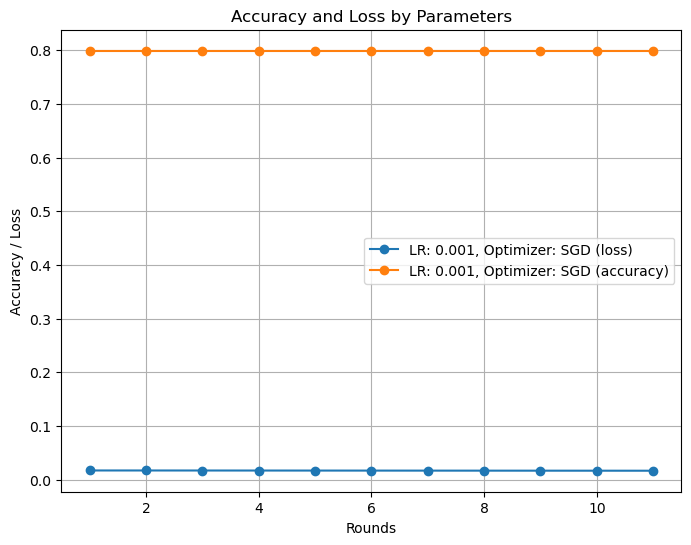

In [26]:
# making some plots
from Medfl.LearningManager.plot import AccuracyLossPlotter

global_accuracy,global_loss = ppl_1.server.accuracies,ppl_1.server.losses
results_dict = {
    ('LR: 0.001, Optimizer: SGD', 'accuracy'): global_accuracy,
    ('LR: 0.001, Optimizer: SGD', 'loss'): global_loss
}
plotter = AccuracyLossPlotter(results_dict)
plotter.plot_accuracy_loss()

In [27]:
"""
from Medfl.LearningManager.plot import AccuracyLossPlotter

client1_accuracy,client1_loss,client1_epsilon = ppl_1.server.flower_clients[0].accuracies,ppl_1.server.flower_clients[0].losses,ppl_1.server.flower_clients[0].epsilons
results_dict = {
    ('LR: 0.001, Optimizer: SGD', 'accuracy'): client1_accuracy,
    ('LR: 0.001, Optimizer: SGD', 'loss'): client1_loss,
    ('LR: 0.001, Optimizer: SGD', 'epsilon'): client1_epsilon
}
plotter = AccuracyLossPlotter(results_dict)
plotter.plot_accuracy_loss()
"""

"\nfrom Medfl.LearningManager.plot import AccuracyLossPlotter\n\nclient1_accuracy,client1_loss,client1_epsilon = ppl_1.server.flower_clients[0].accuracies,ppl_1.server.flower_clients[0].losses,ppl_1.server.flower_clients[0].epsilons\nresults_dict = {\n    ('LR: 0.001, Optimizer: SGD', 'accuracy'): client1_accuracy,\n    ('LR: 0.001, Optimizer: SGD', 'loss'): client1_loss,\n    ('LR: 0.001, Optimizer: SGD', 'epsilon'): client1_epsilon\n}\nplotter = AccuracyLossPlotter(results_dict)\nplotter.plot_accuracy_loss()\n"

In [28]:
ppl_1.auto_test()

/home/hlpc/Desktop/Github/MEDfl/Medfl/LearningManager/utils.py:28: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2 * (sen * ppv) / (sen + ppv)


[{'node_name': 'Midwest',
  'classification_report': "{'confusion matrix': {'TP': 0, 'FP': 2, 'FN': 169, 'TN': 872}, 'Accuracy': 0.836, 'Sensitivity/Recall': 0.0, 'Specificity': 0.998, 'PPV/Precision': 0.0, 'NPV': 0.838, 'F1-score': nan, 'False positive rate': 0.002, 'True positive rate': 0.0}"},
 {'node_name': 'South',
  'classification_report': "{'confusion matrix': {'TP': 4, 'FP': 3, 'FN': 142, 'TN': 559}, 'Accuracy': 0.795, 'Sensitivity/Recall': 0.027, 'Specificity': 0.995, 'PPV/Precision': 0.571, 'NPV': 0.797, 'F1-score': 0.052, 'False positive rate': 0.005, 'True positive rate': 0.027}"},
 {'node_name': 'West',
  'classification_report': "{'confusion matrix': {'TP': 1, 'FP': 2, 'FN': 547, 'TN': 2351}, 'Accuracy': 0.811, 'Sensitivity/Recall': 0.002, 'Specificity': 0.999, 'PPV/Precision': 0.333, 'NPV': 0.811, 'F1-score': 0.004, 'False positive rate': 0.001, 'True positive rate': 0.002}"},
 {'node_name': 'Northeast',
  'classification_report': "{'confusion matrix': {'TP': 19, 'FP': 

(raylet) [2023-08-12 05:58:45,897 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6573744128; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-12 05:58:55,904 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6573740032; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-12 05:59:05,910 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6573740032; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-12 05:59:15,916 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6573711360; capacity: 250375106560. Object creation wil

(raylet) [2023-08-12 06:03:56,090 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6571012096; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-12 06:04:06,101 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6570938368; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-12 06:04:16,108 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6570803200; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-12 06:04:26,114 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6570790912; capacity: 250375106560. Object creation wil

(raylet) [2023-08-12 06:09:06,294 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6568349696; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-12 06:09:16,301 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6568321024; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-12 06:09:26,307 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6568308736; capacity: 250375106560. Object creation will fail if spilling is required.
(raylet) [2023-08-12 06:09:36,313 E 19282 19307] (raylet) file_system_monitor.cc:105: /tmp/ray/session_2023-08-12_05-58-14_586539_19229 is over 95% full, available space: 6568300544; capacity: 250375106560. Object creation wil